# Домашнее задание по статистическому анализу на python

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr

Загрузить датасет по url:


In [59]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [60]:
df.head()
#df.info()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

C:\Users\Olga\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Olga\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


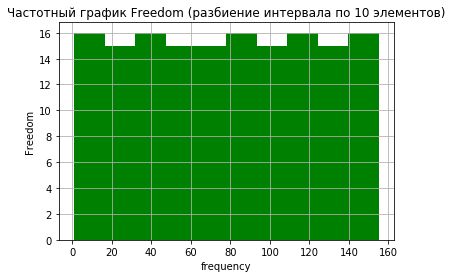

In [61]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

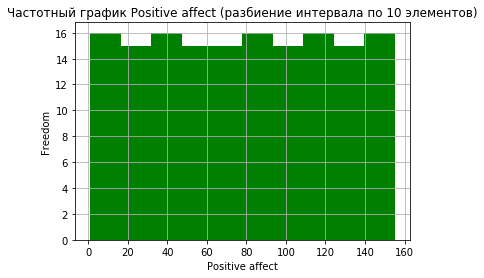

In [62]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Параметры Freedom и positive affect имеют равномерное распределение.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [64]:
df = df[np.isfinite(df['Freedom'])]


# Математическое ожидание
mo = statistics.mean(df['Freedom'])
print(f'Математическое ожидание = {mo} ')

freedom = df['Freedom']

#Выбросы
print(f'Выбросы = {freedom .isnull().sum()} ')

# Медиана 1
num_freedom = len(freedom)
sorted_freedom = sorted(freedom)
middle = (num_freedom // 2)
if num_freedom%2==0:
    result = (sorted_freedom[middle-1] + sorted_freedom[middle])/2
else:
    result = sorted_freedom[middle]
print('Медиана (1): ', result)

# Медиана 2
print('Медиана (2): ', statistics.median(df['Freedom']))

#print(sorted_freedom)

#Мода 1
freedom_counts = {}
for p in freedom:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1

maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
        
print(f'Значение моды (1): {mode_freedom}, Количество встречаемости: {maxp}. Распределение безмодальное')

#print('Значение моды (2): ', statistics.mode(freedom)) 

#Минимум, максимум, размах вариации
print(f'Минимум: {min(freedom)}')
print(f'Максимум: {max(freedom)}')

print(f'Размах вариации: {max(freedom) - min(freedom)}')


#Стандартное отклонение 1
print(f'Стандартное отклонение (1): {statistics.pstdev(freedom)}')

#Стандартное отклонение 2
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)))**(0.5)

print(f'Стандартное отклонение (2): {stdev(freedom)}')

#Дисперсия
print(f'Дисперсия: {statistics.pvariance(freedom)}')



Математическое ожидание = 78.0 
Выбросы = 0 
Медиана (1):  78.0
Медиана (2):  78.0
Значение моды (1): 5.0, Количество встречаемости: 1. Распределение безмодальное
Минимум: 1.0
Максимум: 155.0
Размах вариации: 154.0
Стандартное отклонение (1): 44.74371464239419
Стандартное отклонение (2): 44.74371464239419
Дисперсия: 2002.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601656


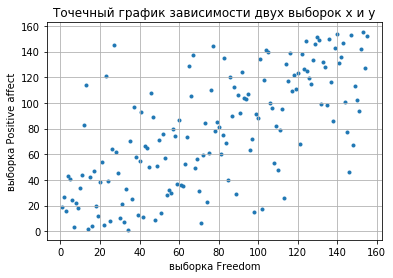

In [65]:
positive_affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')


corr, p_value = pearsonr(freedom, positive_affect)
print(f'Коэффициент корреляции Пирсона: {corr}')

Переменные имеют положительную корреляцию средней силы. 
При повышении показателя Freedom увеличивается показатель Positive affect.



Нормализовать данные колонки Freedom (централизация + масштабирование)

In [66]:
#Центрирование

freedom_1 = freedom - statistics.mean(freedom)
print(f'Среднее центрированной переменной: {statistics.mean(freedom_1)}')

#Масштабирование

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(f'Минимум нормализованной переменной: {min(freedom_2)}')
print(f'Максимум нормализованной переменной:{ max(freedom_2)}')

Среднее центрированной переменной: 0.0
Минимум нормализованной переменной: [-1.]
Максимум нормализованной переменной:[1.]


Построить матрицу корреляций для всех колонок таблицы

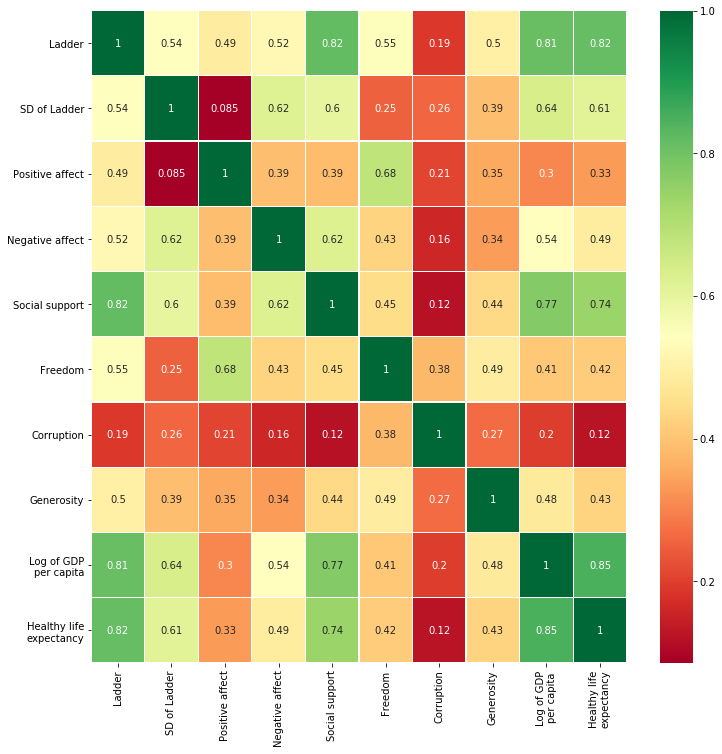

In [68]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [70]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

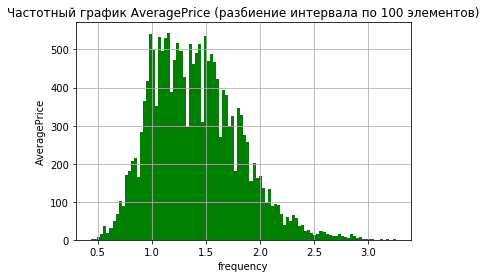

In [71]:
n, bins, patches = plt.hist(df['AveragePrice'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()


Распределение переменной AveragePrice близко к нормальному.

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [72]:
#Нормализация значений
np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0 -0.999909 -0.366548
1 -0.999941 -0.352313
2 -0.999930 -0.651246
3 -0.999900 -0.544484
4 -0.999917 -0.402135


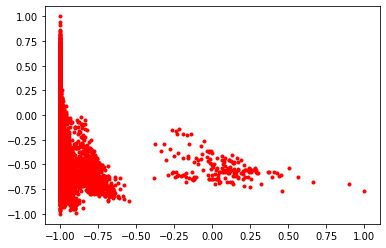

Коэффициент коррекляции: -0.20831704848788477


In [73]:
avocado_4046 = df_norm[0]
price = df_norm[1]

plt.plot(avocado_4046, price, 'r.')
plt.show()

corr, p_value = pearsonr(avocado_4046, price)
print(f'Коэффициент коррекляции: {corr}')

Коэффициент корреляции невысокий. Утверждать о влиянии данного вида авокадо на среднюю стоимость не можем.